In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [3]:
print(mnist_data['data'].shape)
print(mnist_data['target'].shape)

X = mnist_data['data']
y = mnist_data['target']

(70000, 784)
(70000,)


In [5]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


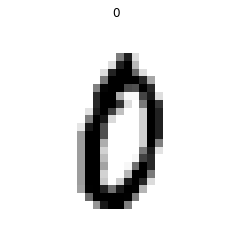

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

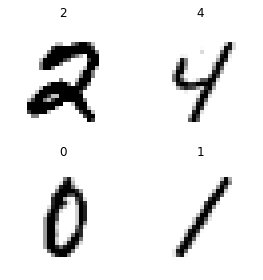

In [7]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [8]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [9]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [16]:
from models import Sequential
from layers import Linear, ReLU, Softmax

# create the model
model = Sequential()
model.add(Linear(16, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(16))
model.add(ReLU())
model.add(Linear(10))
model.add(Softmax())

In [24]:
from losses import CategoricalCrossentropy
from metrics import categorical_accuracy

# prepare the model for training
model.configure(loss=CategoricalCrossentropy(),
                learning_rate=0.1,
                metrics=[categorical_accuracy])

print(model.evaluate(X_train_normalized, y_train_one_hot))

loss=0.377195 	categorical_accuracy=0.896783
(0.3771945364904231, [0.89678335])


In [25]:
# train the model
model.train(X_train_normalized, y_train_one_hot, epochs=20);

Epoch 01	loss=0.376525 	categorical_accuracy=0.891250
Epoch 02	loss=0.375260 	categorical_accuracy=0.897100
Epoch 03	loss=0.374580 	categorical_accuracy=0.892150
Epoch 04	loss=0.373360 	categorical_accuracy=0.897683
Epoch 05	loss=0.372639 	categorical_accuracy=0.892733
Epoch 06	loss=0.371481 	categorical_accuracy=0.898217
Epoch 07	loss=0.370751 	categorical_accuracy=0.893350
Epoch 08	loss=0.369619 	categorical_accuracy=0.898733
Epoch 09	loss=0.368898 	categorical_accuracy=0.893900
Epoch 10	loss=0.367808 	categorical_accuracy=0.899200
Epoch 11	loss=0.367082 	categorical_accuracy=0.894500
Epoch 12	loss=0.366010 	categorical_accuracy=0.899533
Epoch 13	loss=0.365266 	categorical_accuracy=0.895050
Epoch 14	loss=0.364204 	categorical_accuracy=0.899833
Epoch 15	loss=0.363488 	categorical_accuracy=0.895767
Epoch 16	loss=0.362468 	categorical_accuracy=0.900250
Epoch 17	loss=0.361755 	categorical_accuracy=0.896283
Epoch 18	loss=0.360764 	categorical_accuracy=0.900717
Epoch 19	loss=0.360053 	cate

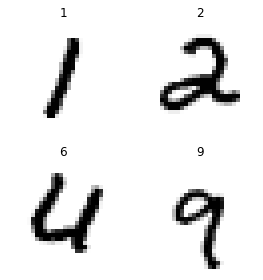

In [50]:
y_pred = np.argmax(model(X_train), axis=-1)

# plot a few predictions
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i+100], y_pred[i+100])

fig.tight_layout()
plt.show()

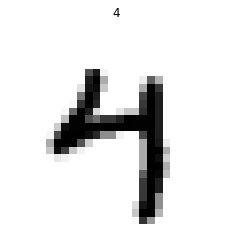

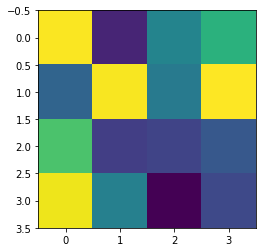

In [51]:
index = 10

plot_example(X_train[index], y_train[index])
plt.show()

# trying to visualize the activation of the first layer
A1 = model.layers[0].forward(X_train[index])
A1 = A1.reshape(4, 4)
plt.imshow(A1)
plt.show()